In [1]:
import platform
import matplotlib.pyplot as plt
from matplotlib import rc
import os
import json
import cv2
import matplotlib.pyplot as plt
import pandas as pd

# font setting
is_mac = 'mac' in platform.platform()
rc('font', family='AppleGothic') if is_mac else rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
!tree ../ -d

../
├── dataset
│   ├── train
│   │   ├── img
│   │   │   └── large
│   │   │       ├── illegal
│   │   │       └── normal
│   │   └── label
│   │       └── large
│   │           ├── illegal
│   │           └── normal
│   └── val
│       ├── img
│       └── label
├── script
└── source

15 directories


In [3]:
train_dir = '../dataset/train/'

for j in ['illegal' , 'normal']:
    for i in ['img' , 'label']:
        data_dir = os.path.join(train_dir , i , 'large' ,j )
        data_size = len(os.listdir(data_dir))
        print(f'{i} {j} size : {data_size}')
    print('-' * 50)

img illegal size : 466
label illegal size : 244
--------------------------------------------------
img normal size : 416
label normal size : 340
--------------------------------------------------


In [4]:
li_img_path = os.path.join(train_dir , 'img' , 'large', 'illegal')
li_label_path = os.path.join(train_dir , 'label' , 'large', 'illegal')
il_img_sample = os.listdir(li_img_path)
il_label_sample = os.listdir(li_label_path)

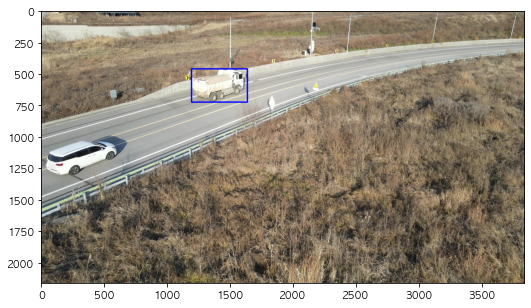

In [5]:
with open(os.path.join(li_label_path , il_label_sample[200]), 'r') as json_read :
    json_str = json.load(json_read) # json.load 로 파일 읽기
img = cv2.imread(os.path.join(li_img_path, json_str['FILE'][0]['FILE_NAME']) )
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
bbox = [int(float(x)) for x in json_str['FILE'][0]['ITEMS'][0]['BOX'].split(',')]
plt.figure(figsize = (16,5))
img = cv2.rectangle(img , (bbox[0], bbox[1]) , (bbox[0] + bbox[2] ,bbox[1] + bbox[3]) , (0 , 0, 255), 10)
plt.imshow(img)
plt.show()

In [12]:
img_info = pd.read_csv('../info/img_info.csv')
obj_info = pd.read_csv('../info/obj_info.csv')

/var/folders/_g/4c6_v3r92pn_jbvkjsw3464w0000gn/T/ipykernel_81689/3843076971.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  obj_info = pd.read_csv('../info/obj_info.csv')


In [14]:
obj_info = pd.read_csv('../info/obj_info.csv' , low_memory= False)

In [38]:
obj_info[obj_info['BOX'].apply(lambda x : len(str(x).split(','))) == 1]

,DRAWING,SEGMENT,BOX,POLYGON,PACKAGE,CLASS,COVER,COURSE,CURVE,FILE_NAME
76595,Polygon,중형차,NaN,"[[1266.2140992167094, 666.7885117493472, 1270....",불법차량,불법개조,NaN,후면좌측,정상주행,A02_B01_C05_D02_1126_I15_F03_22_3.jpg
76596,Polygon,중형차,NaN,"[[1295.0391644908607, 665.5352480417754, 1298....",불법차량,불법개조,NaN,후면좌측,정상주행,A02_B01_C05_D02_1126_I15_F03_22_3.jpg
76597,Polygon,중형차,NaN,"[[1324.6997389033934, 664.6997389033942, 1330....",불법차량,불법개조,NaN,후면좌측,정상주행,A02_B01_C05_D02_1126_I15_F03_22_3.jpg
76598,Polygon,중형차,NaN,"[[1021.4099216710176, 485.9007832898173, 1023....",불법차량,불법개조,NaN,후면우측,우커브,A02_B01_C05_D03_1126_I08_F06_43_2.jpg
76599,Polygon,중형차,NaN,"[[1035.613577023498, 487.1540469973891, 1039.7...",불법차량,불법개조,NaN,후면우측,정상주행,A02_B01_C05_D03_1126_I08_F06_43_2.jpg
...,...,...,...,...,...,...,...,...,...,...
383275,Polygon,소형차,NaN,"[[748.4769364664922, 779.8607484769362, 747.78...",불법차량,불법개조,NaN,후면우측,정상주행,A03_B01_C05_D02_1122_I15_F07_200_3.jpg
383276,Polygon,소형차,NaN,"[[774.9347258485636, 767.3281114012183, 774.93...",불법차량,불법개조,NaN,후면우측,정상주행,A03_B01_C05_D02_1122_I15_F07_200_3.jpg
383277,Polygon,소형차,NaN,"[[804.5953002610961, 756.8146214099215, 802.08...",불법차량,불법개조,NaN,후면우측,정상주행,A03_B01_C05_D02_1122_I15_F07_200_3.jpg
383278,Polygon,소형차,NaN,"[[625.7366654233493, 918.2170831779188, 614.09...",불법차량,불법개조,NaN,후면좌측,정상주행,A03_B01_C05_D02_1124_I15_F03_302_2.jpg


In [31]:
obj_info['BOX'].apply(lambda x : str(x))

0         1561.76,319.85,365.37,406.83
1          1126.06,407.47,470.6,372.22
2          2435.19,377.21,541.8,482.02
3          1293.37,850.65,904.86,461.2
4         2267.57,168.88,329.19,278.22
                      ...             
391732     1683.76,700.73,187.99,134.1
391733     203.37,773.28,274.01,197.67
391734      359.27,745.33,216.4,147.05
391735      655.51,559.89,176.0,176.55
391736     812.11,543.13,161.67,116.55
Name: BOX, Length: 391737, dtype: object